**PROBLEM STATEMENT**

Football is one if the most loved sports worldwide. The FIFA World Cup, a global football sporting event  that takes place every 4 years, was in Quatar in 2022. The dataset containts 30,000 tweets form the first day of the tornament.

In [33]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       22524 non-null  int64 
 1   Date Created     22524 non-null  object
 2   Number of Likes  22524 non-null  int64 
 3   Source of Tweet  22524 non-null  object
 4   Tweet            22524 non-null  object
 5   Sentiment        22524 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [5]:
df.duplicated().sum()

0

In [11]:
data = df[['Tweet']]
print(data)

                                                   Tweet
0      What are we drinking today @TucanTribe \n@MadB...
1      Amazing @CanadaSoccerEN  #WorldCup2022 launch ...
2      Worth reading while watching #WorldCup2022 htt...
3      Golden Maknae shinning bright\n\nhttps://t.co/...
4      If the BBC cares so much about human rights, h...
...                                                  ...
22519            Here We go World cup 2022 #WorldCup2022
22520  Anderlecht confirms former Viborg FF's Jesper ...
22521  Great thread to read before the start of #Worl...
22522  Raphinha wants Brazil to be united at the #Wor...
22523  How to buy $SOT on PinkSale?🤔\n\nHave you been...

[22524 rows x 1 columns]


In [12]:
data = pd.DataFrame(data, columns=['Tweet'])

In [34]:
#text cleaning
import re
import nltk
import string
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stopword = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
from textblob import TextBlob
from wordcloud import WordCloud
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
#removing commas
data['Tweet'] = data['Tweet'].apply(lambda v: re.sub(',', '', v))

In [14]:
#removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed Characters
        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

data['Tweet'] = data['Tweet'].apply(remove_emoji)
data

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022 htt...
3,Golden Maknae shinning bright\n\nhttps://t.co/...
4,If the BBC cares so much about human rights ho...
...,...
22519,Here We go World cup 2022 #WorldCup2022
22520,Anderlecht confirms former Viborg FF's Jesper ...
22521,Great thread to read before the start of #Worl...
22522,Raphinha wants Brazil to be united at the #Wor...


In [15]:
#removing html tags
def remove_html_tags(text):
    html_pattern = re.compile(r'<.*?>')
    return html_pattern.sub(r'', text)

data['Tweet'] = data['Tweet'].apply(remove_html_tags)
data

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022 htt...
3,Golden Maknae shinning bright\n\nhttps://t.co/...
4,If the BBC cares so much about human rights ho...
...,...
22519,Here We go World cup 2022 #WorldCup2022
22520,Anderlecht confirms former Viborg FF's Jesper ...
22521,Great thread to read before the start of #Worl...
22522,Raphinha wants Brazil to be united at the #Wor...


In [17]:
#removing urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data['Tweet'] = data['Tweet'].apply(remove_urls)
data

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022
3,Golden Maknae shinning bright\n\n\n#JeonJungko...
4,If the BBC cares so much about human rights ho...
...,...
22519,Here We go World cup 2022 #WorldCup2022
22520,Anderlecht confirms former Viborg FF's Jesper ...
22521,Great thread to read before the start of #Worl...
22522,Raphinha wants Brazil to be united at the #Wor...


In [18]:
#data prep
#tokenization
#Stopwords
#Stemming
#lower case

data['Tweet'] = data['Tweet'].str.lower()
data

,Tweet
0,what are we drinking today @tucantribe \n@madb...
1,amazing @canadasocceren #worldcup2022 launch ...
2,worth reading while watching #worldcup2022
3,golden maknae shinning bright\n\n\n#jeonjungko...
4,if the bbc cares so much about human rights ho...
...,...
22519,here we go world cup 2022 #worldcup2022
22520,anderlecht confirms former viborg ff's jesper ...
22521,great thread to read before the start of #worl...
22522,raphinha wants brazil to be united at the #wor...


In [19]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
#removing all punctuation characters from each text
data['Tweet'] = data['Tweet'].apply(lambda doc: ''.join([x for x in doc if x not  in punctuation]))

In [21]:
data.sample(10)

,Tweet
11040,okay lemme be patriotic for the next 90 minute...
15095,beautiful opening ceremony worldcup2022
2752,make £420 profit with this william hill price ...
18704,todays the day the world cup starts\nwhat’s on...
20860,the international community did not sanction i...
19772,time to use fifa 23 cpu v cpu to make my pre...
15265,this opening ceremony has me really feeling th...
5026,stunt on them ecuador worldcup2022
6121,penalty to ecuador quit with the corruption ta...
2681,with this qatar team in the group i think holl...


In [22]:
#remove rows where the list is empty
data = data[data['Tweet'].apply(lambda x: len(x)>0)]
print(data.head(10))

                                               Tweet
0  what are we drinking today tucantribe \nmadbea...
1  amazing canadasocceren  worldcup2022 launch vi...
2         worth reading while watching worldcup2022 
3  golden maknae shinning bright\n\n\njeonjungkoo...
4  if the bbc cares so much about human rights ho...
5  and like will the mexican fans be able to scre...
6  look like a only me and the jamaican football ...
7  really football on a monday morning at 9 and 1...
8  as the world cup starts in qatar it’s black aw...
9  worldcup2022 itvsport amp lfsystemmusic go tog...


In [23]:
#removing stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'am', 'up', 'this', 'ourselves', 'too', 'after', 'be', 'ma', 'down', 'below', 'with', 'did', "needn't", 'no', 'only', 'itself', 'so', 'yours', 'its', "you're", 'we', 'each', 'themselves', 'while', "hasn't", "aren't", 'over', 'now', 't', 'couldn', 'a', "it's", 'about', 'shan', 'was', 'it', 'from', 'who', 'between', 'hasn', 'aren', 'an', "shan't", 'yourselves', 'by', "that'll", 'o', 'myself', 'what', 'has', 'them', 'didn', 're', 'hers', 'but', 'here', 'where', "she's", 'were', 'and', 'his', 'than', 'won', 'both', 'above', 'll', "mustn't", 'doing', 'until', 'as', 'before', 'under', 'himself', 'when', 'shouldn', 'during', "you'd", 'against', 'theirs', 'will', 'i', 'own', 'are', 'then', "you've", 'further', 'just', 'do', 'which', 'me', 'into', 'does', 'm', 'some', 'to', 'other', 'wouldn', 'same', 'at', 'why', 'haven', "shouldn't", 'or', 'in', 'my', 'ain', "haven't", 'that', "you'll", 's', 'few', 'more', 'all', 'can', 'being', 'you', 'out', 'again', "should've", 'off', 'such', 'mightn', 'ne

In [24]:
data['Tweet'] = data['Tweet'].apply(lambda y: " ".join([j for j in y.split() if j not in stop_words]))
data.sample(10)

,Tweet
19053,sunday november 20 7pm opening match fifa worl...
14410,cant translator hear message world fifaworldcu...
13007,simulated worldcup2022 soccer football work pr...
4284,brfootball valencia may become world cup top s...
12786,match result ecuador lost 5 last 9 away world ...
13806,lets celebrate world cup 2022 worldcup2022 nft...
14824,jeon jungkook you’re making history worldcup2022
10098,worldcup2022 supporters cheer ahead qatar 2022...
3494,half time interesting start lets see next half...
6392,thought ecuador got ecua week worldcup2022


In [27]:
#tokenization
data['Tweet'] = data['Tweet'].apply(word_tokenize)
data.sample(10)

,Tweet
10007,"[booommm, goes, 00, prediction, haha, 150, sec..."
19016,"[ghana, lose, group, stages, speaking, behalf,..."
15010,"[amazing, opening, كأسالعالمقطر2022, worldcup2..."
18835,"[vice, president, india, arrives, doha, qnaeng..."
18018,"[two, tough, guys, sitting, worldcup2022, sadi..."
18648,"[beer, youll, getting, world, cup, takbeer, wo..."
19529,"[worldcup2022, zubenathihlong2, boiweezy1, giv..."
16346,"[fifa, world, cup, 2022, opening, ceremony, li..."
8932,"[offside, worldcup2022]"
1747,"[world, cup, 2022, schedule, theroadtoworldcup..."


In [30]:
#parts of speech tags
data['Tweet'] = data['Tweet'].apply(nltk.tag.pos_tag)
data.head()

,Tweet
0,"[(drinking, VBG), (today, NN), (tucantribe, JJ..."
1,"[(amazing, VBG), (canadasocceren, NN), (worldc..."
2,"[(worth, JJ), (reading, VBG), (watching, VBG),..."
3,"[(golden, JJ), (maknae, NN), (shinning, VBG), ..."
4,"[(bbc, NN), (cares, NNS), (much, JJ), (human, ..."


In [31]:
#converting the parts of speech to wordnet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
      return wordnet.ADJ
    elif tag.startswith('V'):
      return wordnet.VERB
    elif tag.startswith('N'):
      return wordnet.NOUN
    elif tag.startswith('R'):
      return wordnet.ADV
    else:
      return wordnet.NOUN

data['Tweet'] = data['Tweet'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
data.head()


,Tweet
0,"[(drinking, v), (today, n), (tucantribe, a), (..."
1,"[(amazing, v), (canadasocceren, n), (worldcup2..."
2,"[(worth, a), (reading, v), (watching, v), (wor..."
3,"[(golden, a), (maknae, n), (shinning, v), (bri..."
4,"[(bbc, n), (cares, n), (much, a), (human, a), ..."


In [32]:
# Applying word lemmatizer
#converts the word to a meaningful base form.
#For example, "running" becomes "run", "better" becomes "good" if part-of-speech is considered.)

lemmatizer = WordNetLemmatizer()
data['Tweet'] = data['Tweet'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
data.head()

,Tweet
0,"[drink, today, tucantribe, madbears, lkincalgo..."
1,"[amaze, canadasocceren, worldcup2022, launch, ..."
2,"[worth, read, watch, worldcup2022]"
3,"[golden, maknae, shin, bright, jeonjungkook, j..."
4,"[bbc, care, much, human, right, homosexual, ri..."


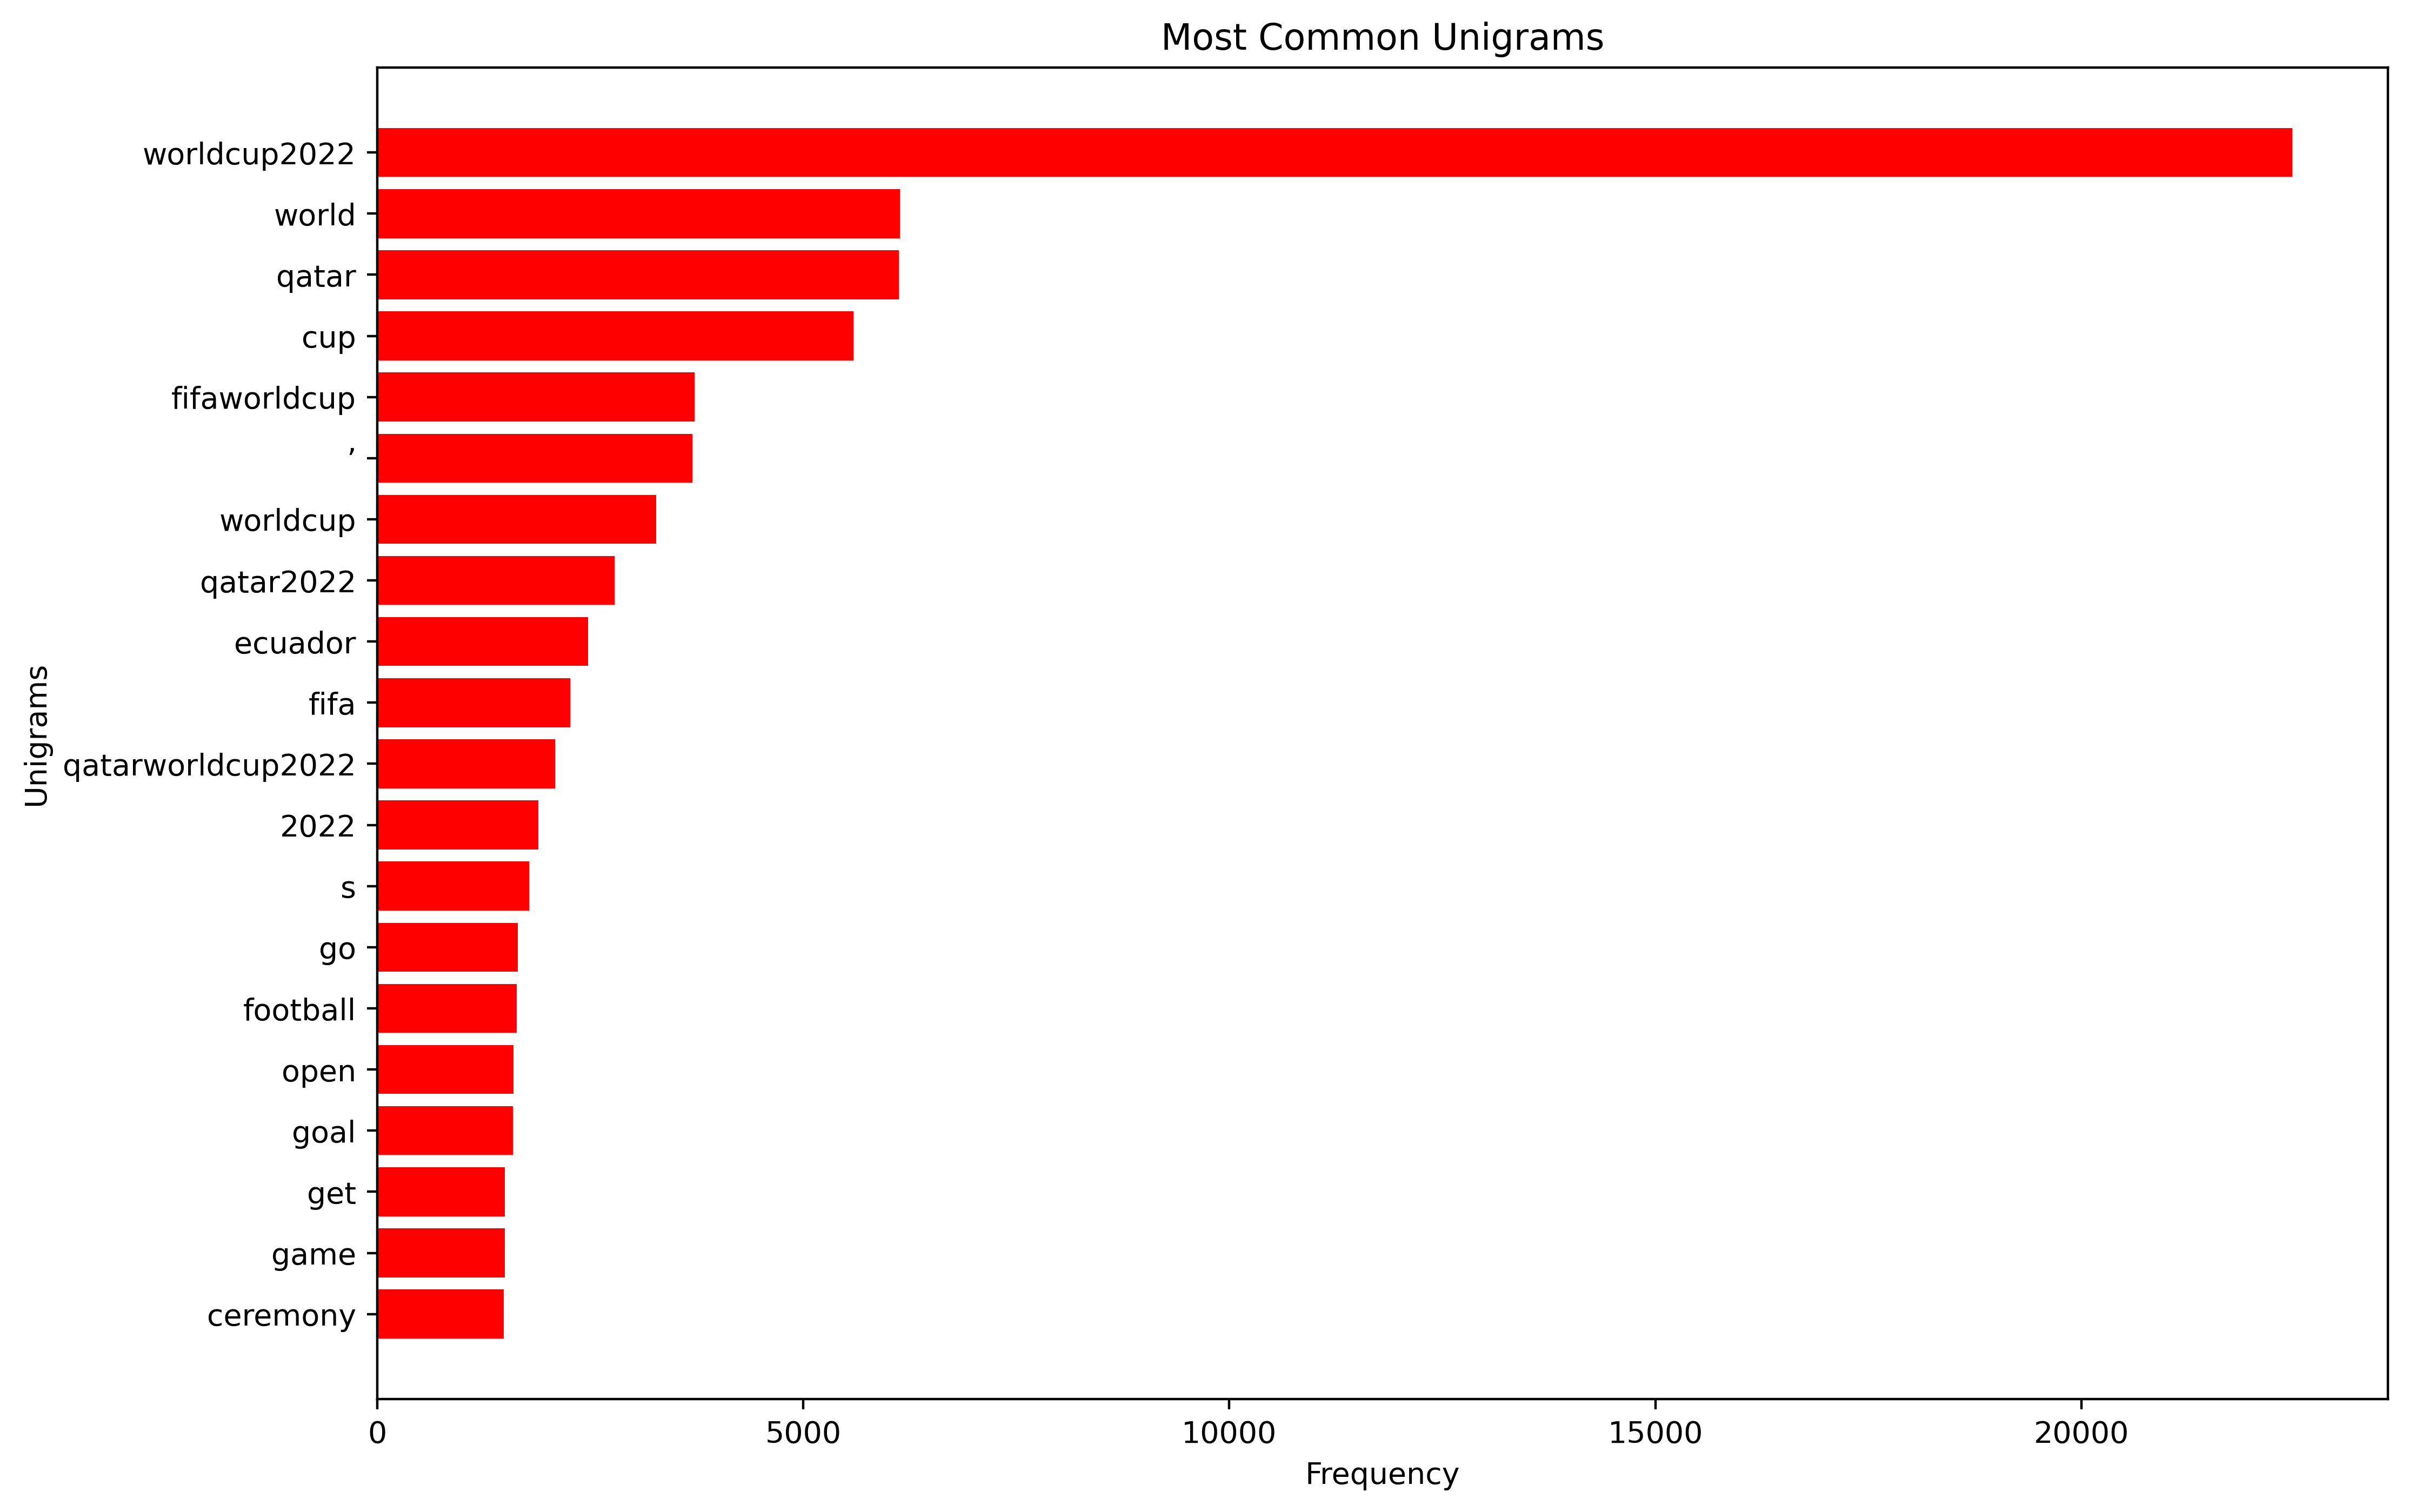

In [35]:
#visualization
#most common unigrams
from collections import Counter

#flatten the list of words in the entire dataset
all_words = [word for tokens in data['Tweet'] for word in tokens]

#count the frequency of each word
word_freq = Counter(all_words)

#get the 20 most common unigrams
common_words = word_freq.most_common(20)

#split the words and their counnts for plotting
words, counts = zip(*common_words)

#plotting the most common unigrams
plt.figure(figsize=(12,8), dpi=400)
plt.barh(words, counts, color = 'red')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.title('Most Common Unigrams')
plt.show()

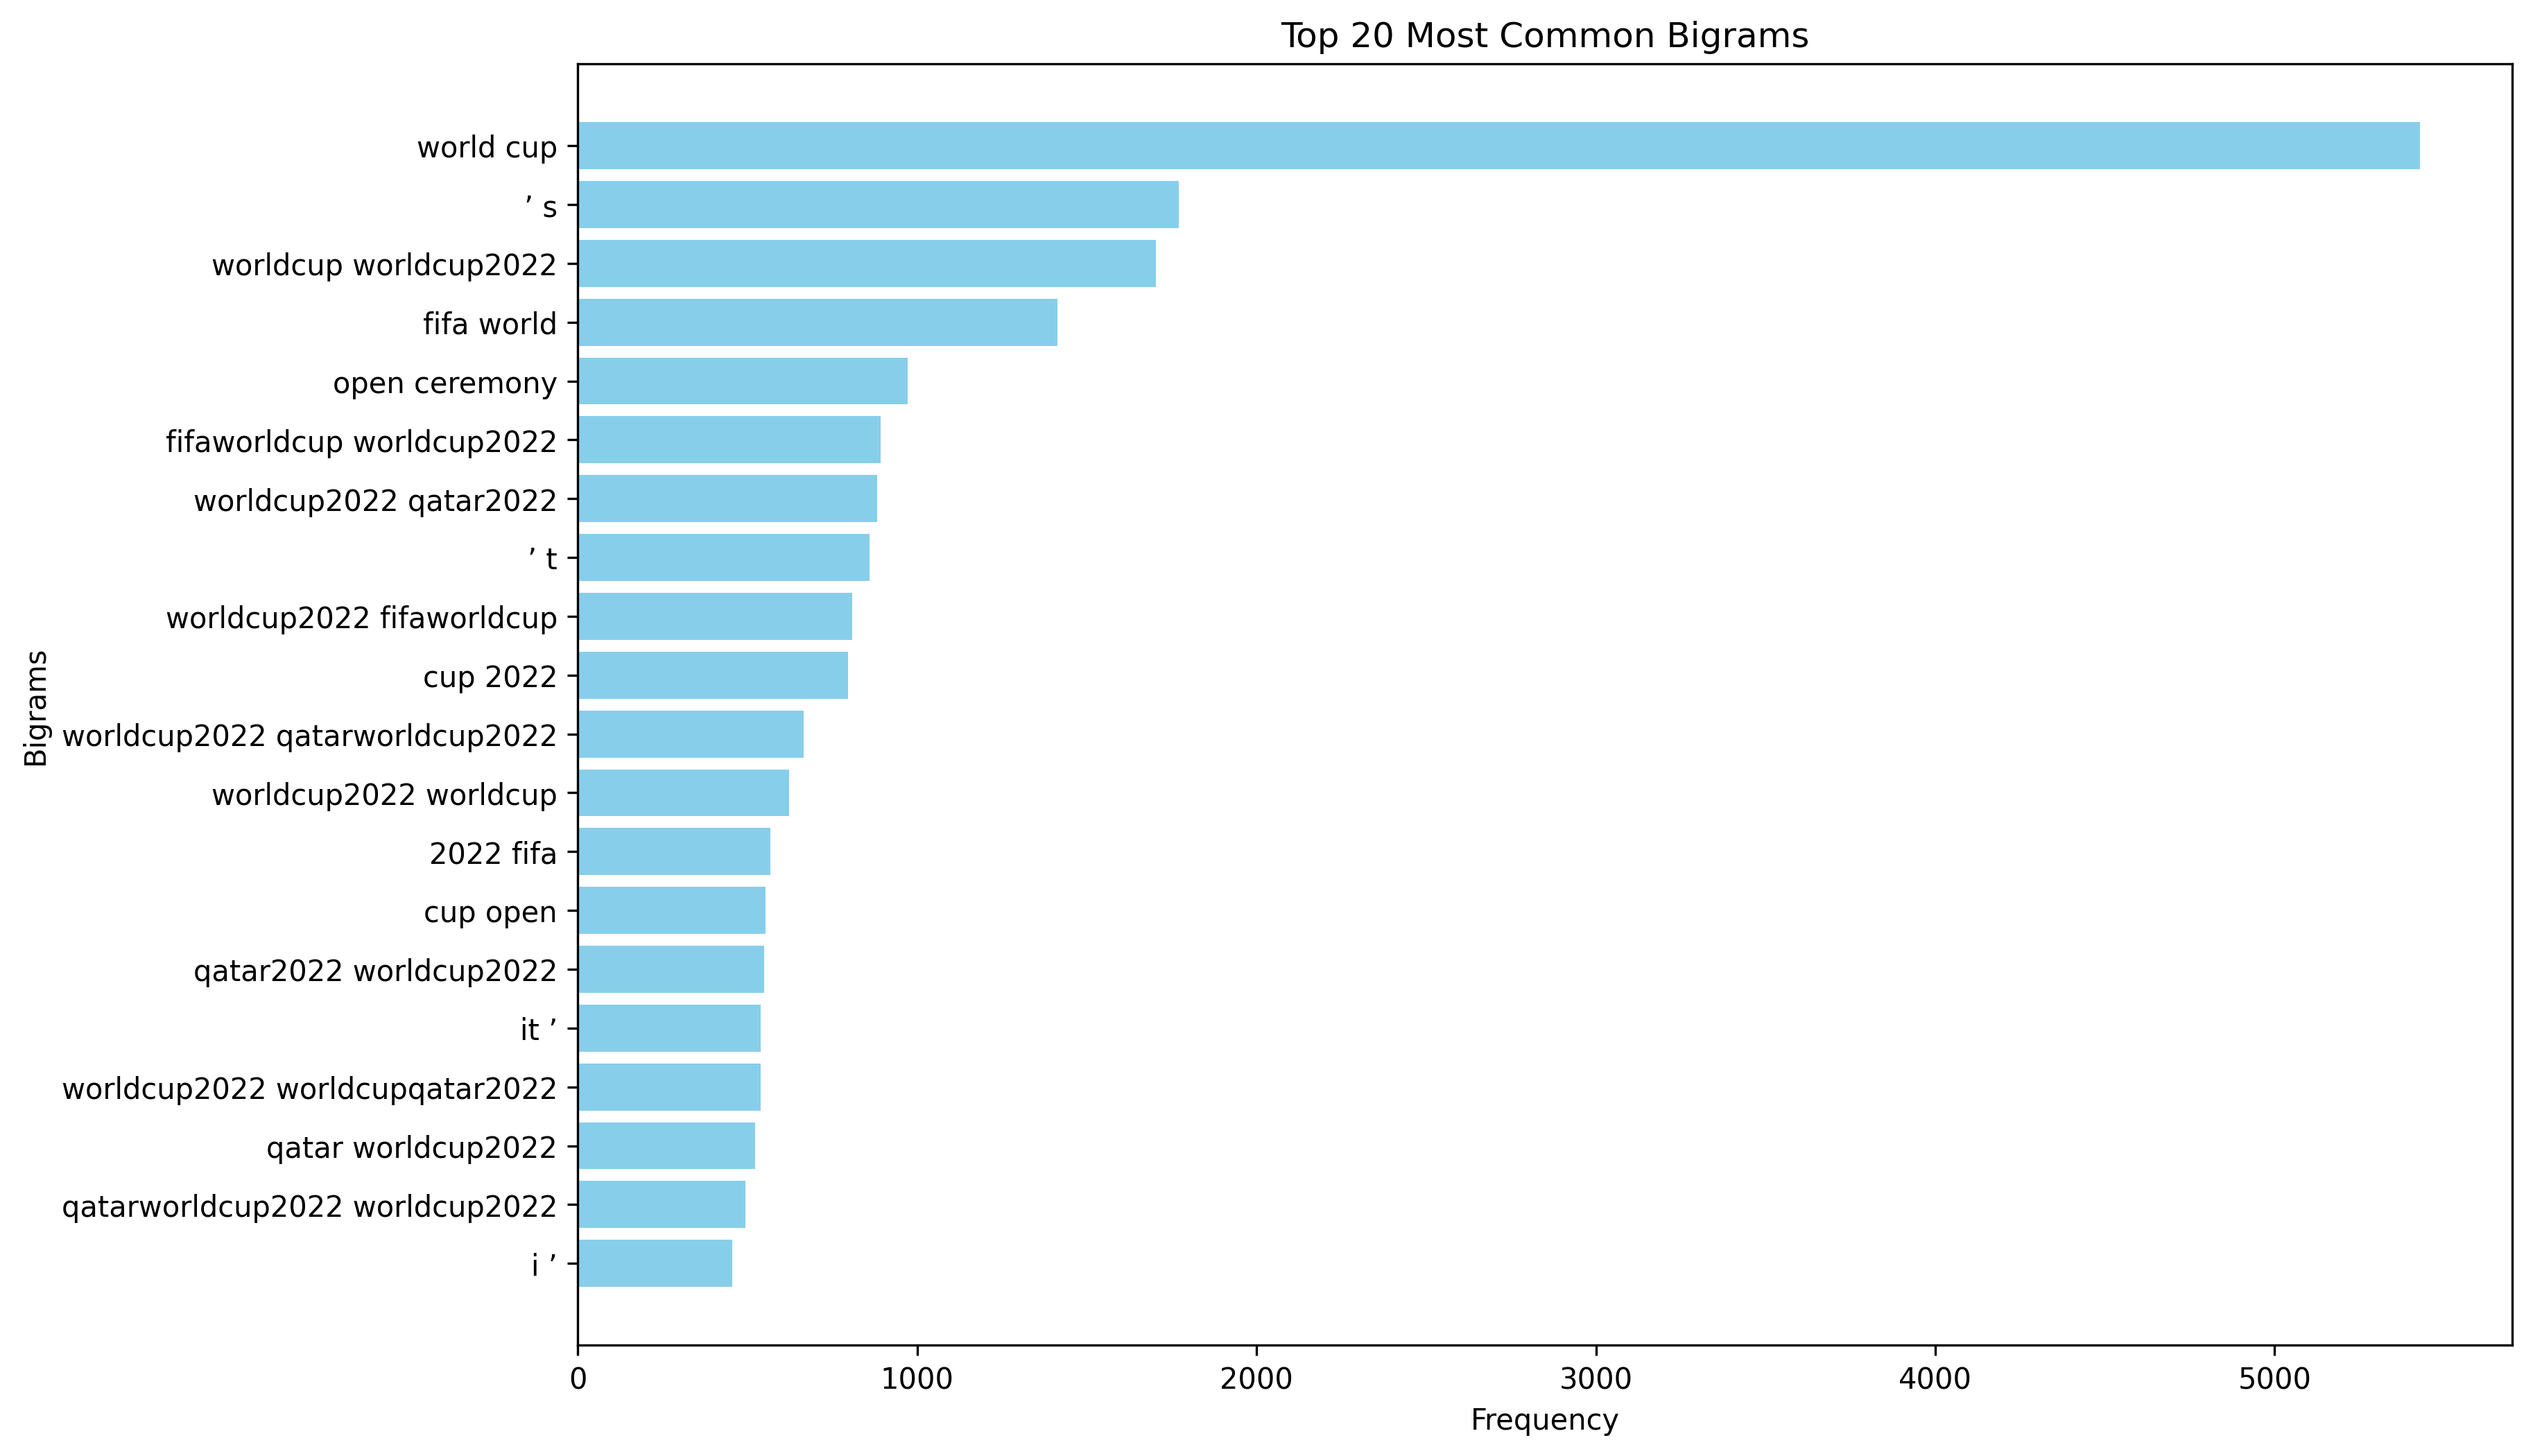

In [40]:
from nltk import bigrams

# Generate bigrams from the tokenized text
all_bigrams = [bigram for tokens in data['Tweet'] for bigram in bigrams(tokens)]

# Count the frequency of each bigram
bigram_freq = Counter(all_bigrams)

# Get the 20 most common bigrams
common_bigrams = bigram_freq.most_common(20)

# Split the bigrams and their counts for plotting
bigrams_labels, counts = zip(*common_bigrams)
bigrams_labels = [' '.join(bigram) for bigram in bigrams_labels]  # Join bigrams into readable format

# Plotting the most common bigrams with increased DPI
plt.figure(figsize=(12, 8), dpi=300)
plt.barh(bigrams_labels, counts, color='skyblue')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most common at the top
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Most Common Bigrams')
plt.show()

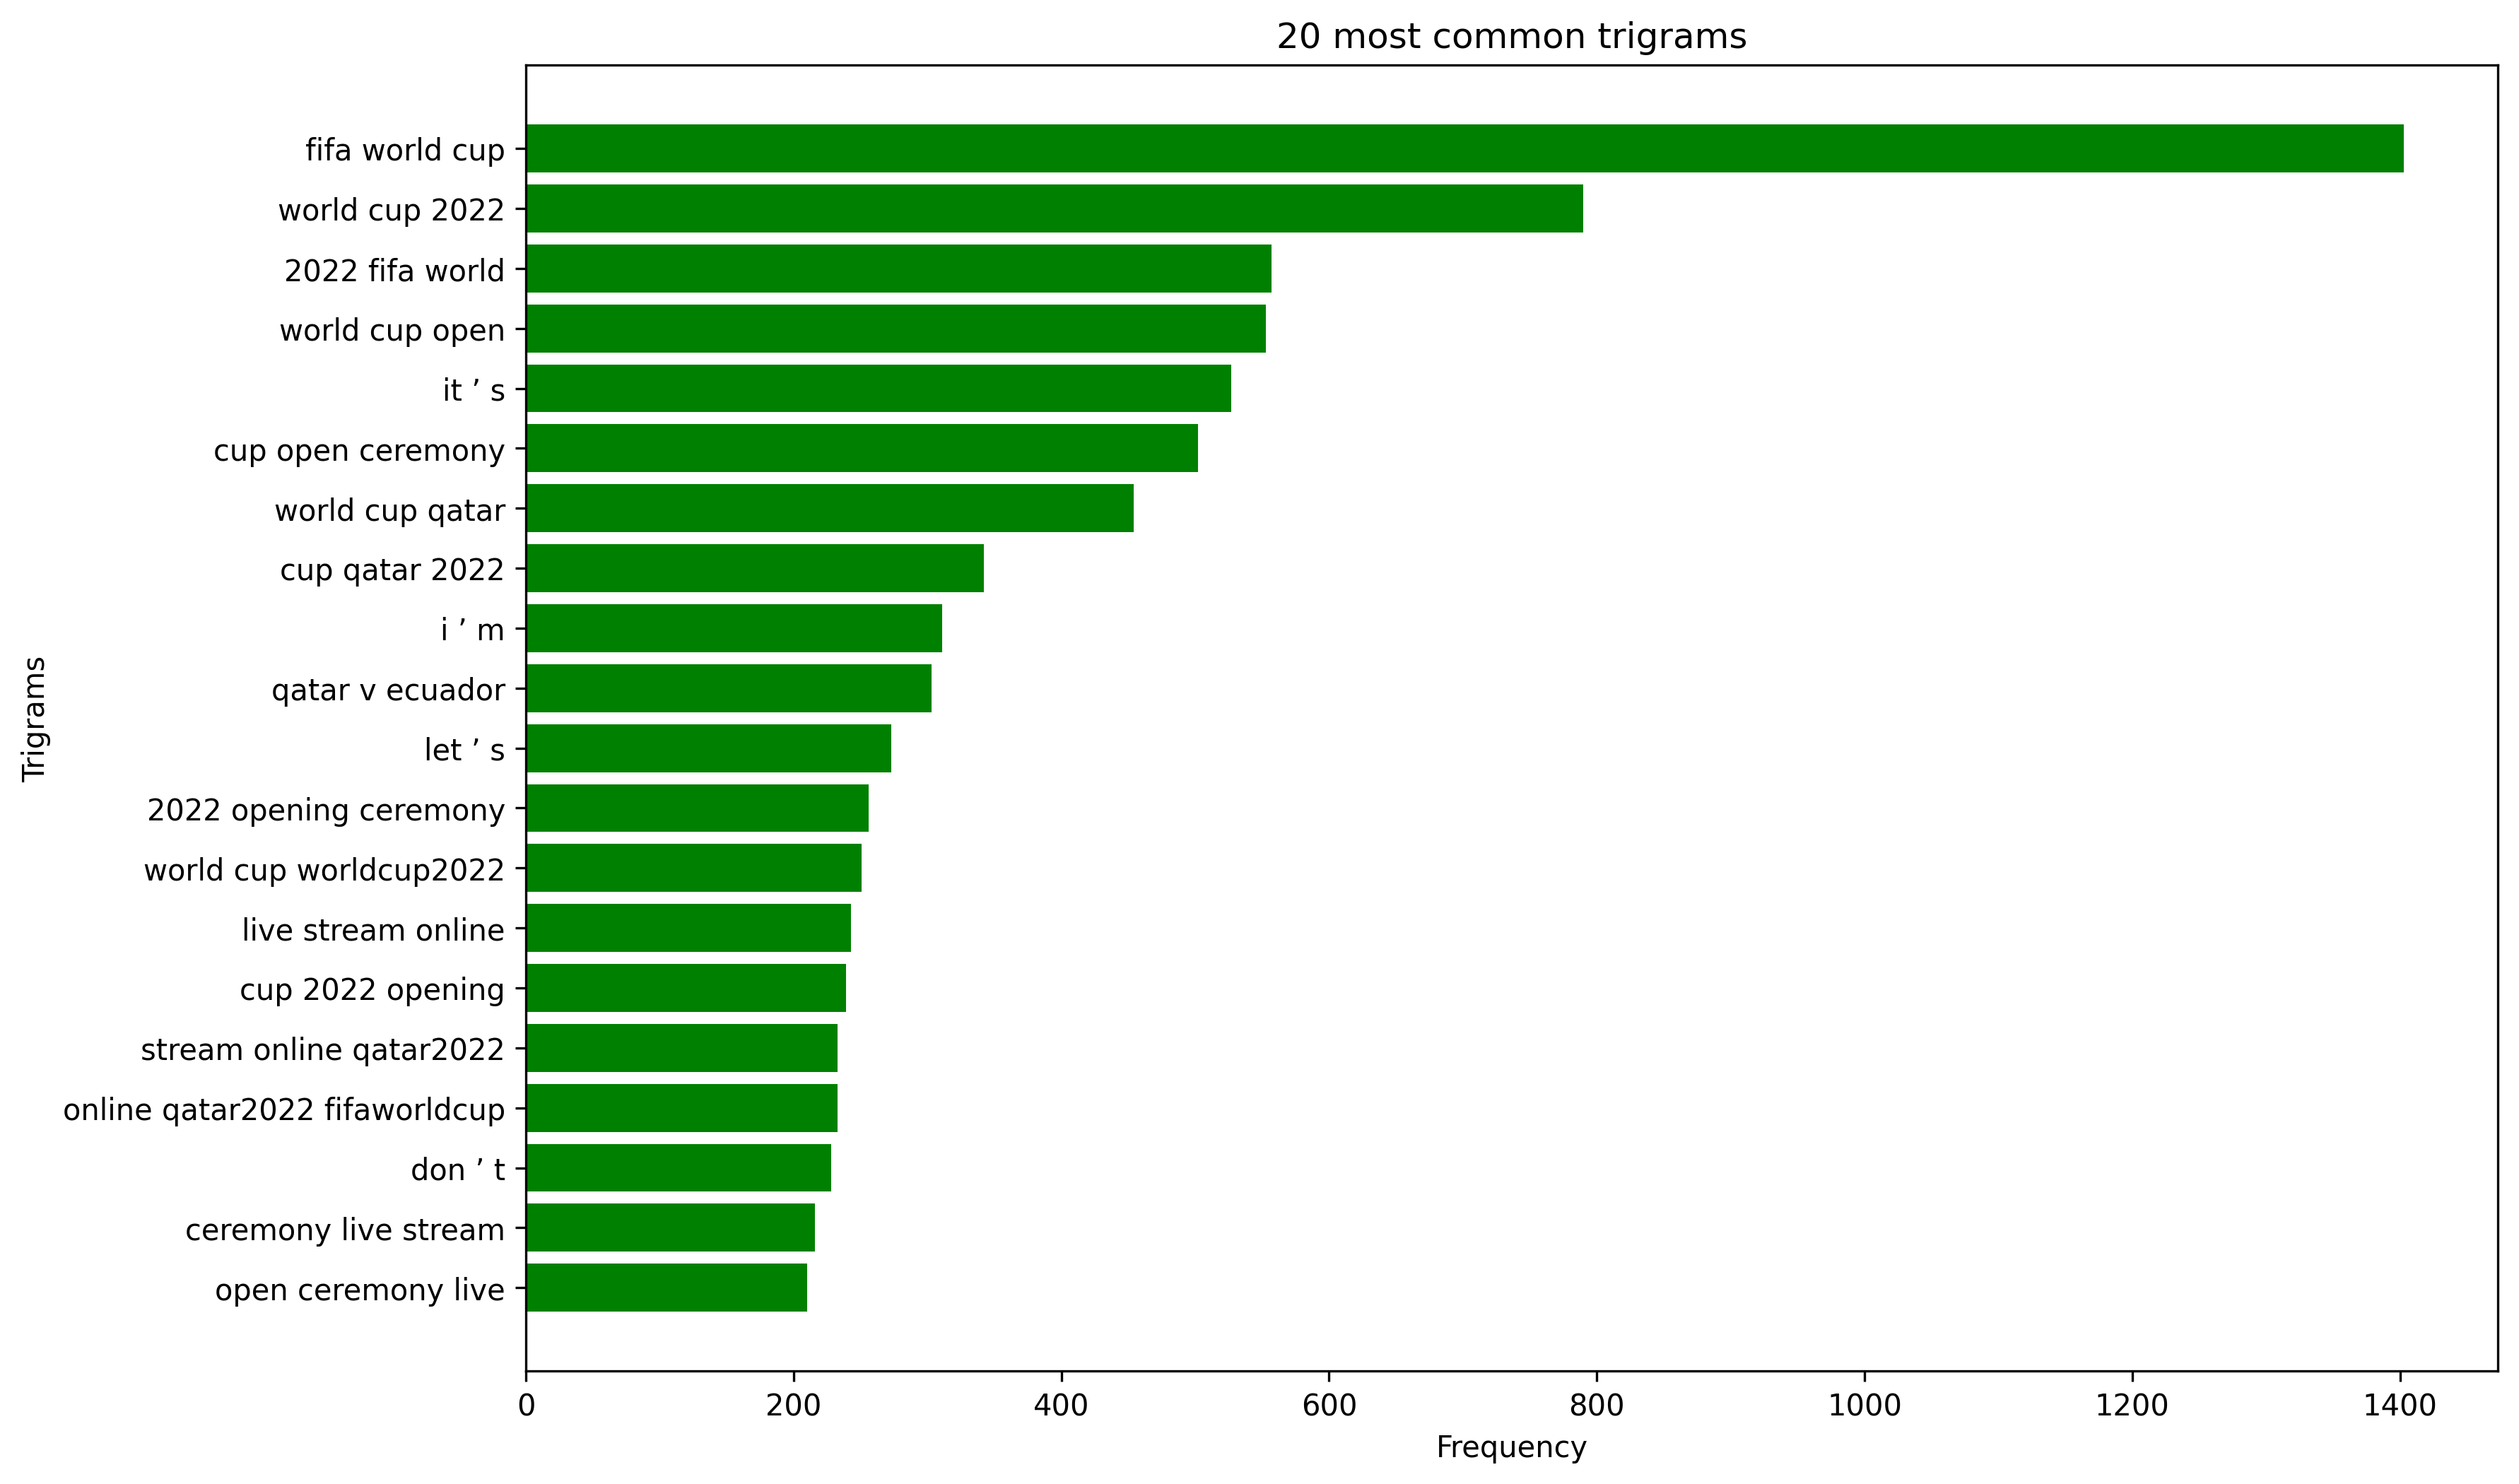

In [41]:
from nltk import trigrams

#generating trigrams from the tokenized text
all_trigrams = [trigram for tokens in data['Tweet'] for trigram in trigrams(tokens)]

#counting the frequncey of each trigram
trigram_frq = Counter(all_trigrams)

#getting the 20 most common trigrams
common_trigrams = trigram_frq.most_common(20)

#splitting
trigrams_labels, counts = zip(*common_trigrams)
trigrams_labels = [' '.join(trigram) for trigram in trigrams_labels]

#plotting
plt.figure(figsize=(12,8), dpi = 300)
plt.barh(trigrams_labels, counts, color = 'green')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('20 most common trigrams')
plt.show()

In [43]:
#subjectivity score
#used to show how many reviews contain personal opinion
def get_subjectivity(text):
    Subjectivity_s = TextBlob(str(text))
    return Subjectivity_s.sentiment.subjectivity

data['Subjectivity_score'] = data['Tweet'].apply(lambda x: get_subjectivity(x))

In [44]:
data.head()

,Tweet,Subjectivity_score
0,"[drink, today, tucantribe, madbears, lkincalgo...",0.000000
1,"[amaze, canadasocceren, worldcup2022, launch, ...",0.216667
2,"[worth, read, watch, worldcup2022]",0.100000
3,"[golden, maknae, shin, bright, jeonjungkook, j...",0.650000
4,"[bbc, care, much, human, right, homosexual, ri...",0.451190


In [47]:
#compund score
#sum of positive, negative, and neutral scores that is then normalized between -1(most extreme negative) and +1(most extreme positive)
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#creating an object vader
vader_score = SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.8 MB/s eta 0:00:00


In [48]:
data['Compound_score'] = [vader_score.polarity_scores(m)['compound'] for m in data['Tweet']]
data.head()

,Tweet,Subjectivity_score,Compound_score
0,"[drink, today, tucantribe, madbears, lkincalgo...",0.000000,0.0
1,"[amaze, canadasocceren, worldcup2022, launch, ...",0.216667,0.0
2,"[worth, read, watch, worldcup2022]",0.100000,0.0
3,"[golden, maknae, shin, bright, jeonjungkook, j...",0.650000,0.0
4,"[bbc, care, much, human, right, homosexual, ri...",0.451190,0.0


In [50]:
def Results(text):
    over_all = vader_score.polarity_scores(text)
    if over_all['compound'] >= 0.05:
      return "Positive"
    elif over_all['compound'] <= -0.05:
      return "Negative"
    else:
      return "Neutral"

data['Overall_sentiment'] = data['Tweet'].apply(Results)

In [51]:
data.head()

,Tweet,Subjectivity_score,Compound_score,Overall_sentiment
0,"[drink, today, tucantribe, madbears, lkincalgo...",0.000000,0.0,Neutral
1,"[amaze, canadasocceren, worldcup2022, launch, ...",0.216667,0.0,Neutral
2,"[worth, read, watch, worldcup2022]",0.100000,0.0,Neutral
3,"[golden, maknae, shin, bright, jeonjungkook, j...",0.650000,0.0,Neutral
4,"[bbc, care, much, human, right, homosexual, ri...",0.451190,0.0,Neutral


In [52]:
data['Overall_sentiment'].value_counts()

,count
Overall_sentiment,
Neutral,22508
Negative,16


In [53]:
#wordcloud
from wordcloud import WordCloud, ImageColorGenerator

#concatenate all the text into a single string
tweet = " ".join([" ".join(j) for j in data['Tweet']])

data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join(x))

data['Tweet']

,Tweet
0,drink today tucantribe madbears lkincalgo algo...
1,amaze canadasocceren worldcup2022 launch video...
2,worth read watch worldcup2022
3,golden maknae shin bright jeonjungkook jungkoo...
4,bbc care much human right homosexual right wom...
...,...
22519,go world cup 2022 worldcup2022
22520,anderlecht confirm former viborg ffs jesper fr...
22521,great thread read start worldcup2022
22522,raphinha want brazil united worldcup2022


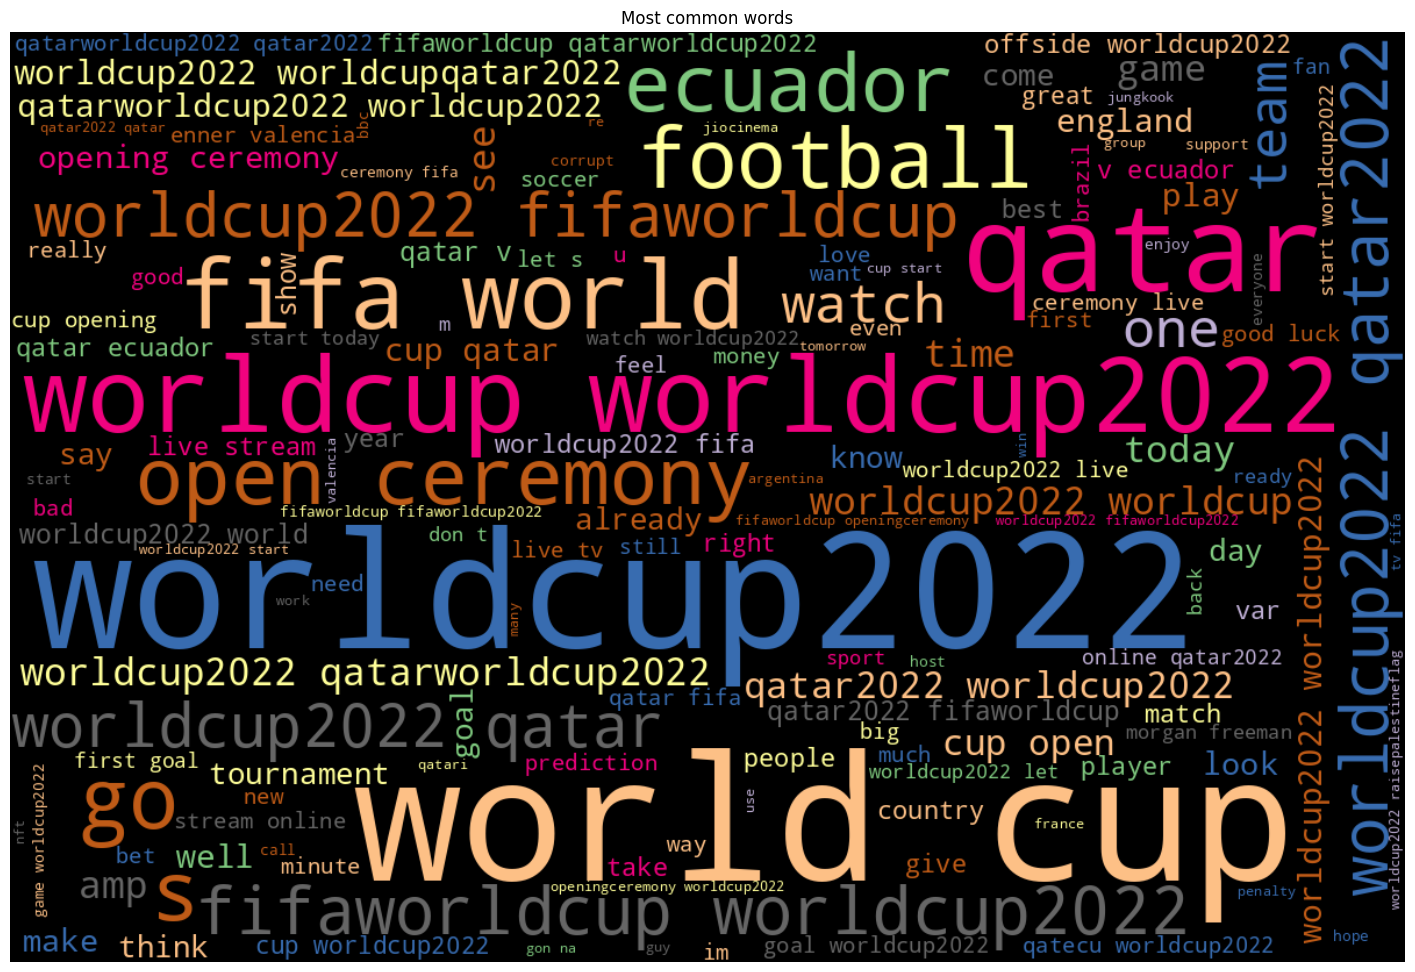

In [54]:
cont = data['Tweet'].str.cat(sep = ' ')

Word_CL = WordCloud(background_color='black', contour_width=0.1, contour_color='grey', colormap='Accent', mode='RGB', max_words=150, max_font_size=150, width = 1200, height = 800).generate(cont)
plt.figure(figsize=(18,18))
plt.imshow(Word_CL, interpolation = 'bilinear')
plt.title('Most common words')
plt.axis('off')
plt.show()